### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import backend
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [9]:
# Versioning
print(keras.__version__)
print(tf.__version__)

2.2.4
1.10.0


### Read in data set

In [2]:
#Pandas DataFrame
option_df = pd.read_pickle("option_data.pkl")
option_df.tail()

,Stock,Strike,Time,Volatility,Call Price
812245,198.0,193.757713,0.9,0.35,32.152806
812246,198.0,193.757713,0.9,0.40,35.657525
812247,198.0,193.757713,0.9,0.45,39.160207
812248,198.0,193.757713,0.9,0.50,42.654775
812249,198.0,193.757713,0.9,0.55,46.136680


In [3]:
##Normalize data
option_df['Stock'] = option_df['Stock'].div(option_df.Strike)
option_df['Call Price'] = option_df['Call Price'].div(option_df.Strike)
option_df['Strike'] = 1


In [4]:
option_df.head(10)

,Stock,Strike,Time,Volatility,Call Price
0,1.158462,1,0.1,0.10,0.163449
1,1.158462,1,0.1,0.15,0.163458
2,1.158462,1,0.1,0.20,0.163631
3,1.158462,1,0.1,0.25,0.164330
4,1.158462,1,0.1,0.30,0.165797
5,1.158462,1,0.1,0.35,0.168055
6,1.158462,1,0.1,0.40,0.171020
7,1.158462,1,0.1,0.45,0.174578
8,1.158462,1,0.1,0.50,0.178618
9,1.158462,1,0.1,0.55,0.183051


### Build Keras Model

In [5]:
prices = option_df.values

In [23]:
# Decide split for train and test set

m = 0.8
end = len(prices)
split = int(m*end)


In [24]:
## Define X & Y
X_train = prices[:split,:4]
y_train = prices[:split,4:5]
X_test = prices[split:end, :4]
y_test = prices[split:end,4:5]


In [25]:
def custom_activation(x):
    return backend.exp(x)

In [32]:
def create_model(optimizer = 'rmsprop'):

    neurons = 100

    model = Sequential()

    model.add(Dense(neurons, input_shape=(4,), activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.25))


    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(1))
    model.add(Activation(custom_activation))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['accuracy'])
    
    return model


In [33]:
neural_network = KerasClassifier(build_fn=create_model, verbose=0)

In [34]:
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

In [39]:
callbacks_list = [EarlyStopping(monitor = 'loss', patience=1)]

In [40]:
# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, cv = 5)

# Fit grid search
grid_result = grid.fit(X_train, y_train, verbose = 2, callbacks= callbacks_list)

Epoch 1/5
 - 557s - loss: 110184257220651328.0000 - acc: 5.7710e-06
Epoch 2/5
 - 549s - loss: 6555413698934417129472.0000 - acc: 3.8473e-06
Epoch 1/5
 - 549s - loss: 21671819704836476928.0000 - acc: 3.8473e-06
Epoch 2/5
 - 548s - loss: 5552213220768533504.0000 - acc: 3.8473e-06
Epoch 3/5
 - 555s - loss: 98441265822771634503680.0000 - acc: 5.7710e-06
Epoch 1/5
 - 551s - loss: 23224517696118712.0000 - acc: 1.9237e-06
Epoch 2/5
 - 550s - loss: 33872925854038354821120.0000 - acc: 0.0000e+00
Epoch 1/5
 - 560s - loss: 112058819073732968448.0000 - acc: 1.9237e-06
Epoch 2/5
 - 561s - loss: 6311254232953503350784.0000 - acc: 0.0000e+00
Epoch 1/5
 - 557s - loss: 14691806824924404.0000 - acc: 1.9237e-06
Epoch 2/5
 - 560s - loss: 66891682879297683456.0000 - acc: 1.9237e-06
Epoch 1/5
 - 636s - loss: 1125570335763447424.0000 - acc: 0.0000e+00
Epoch 2/5
 - 639s - loss: nan - acc: 1.9237e-06


C:\Users\blues\Anaconda3\lib\site-packages\keras\callbacks.py:543: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


Epoch 1/5
 - 640s - loss: 325646073182.7313 - acc: 7.6947e-06
Epoch 2/5
 - 640s - loss: 3403232245.3350 - acc: 9.6183e-06
Epoch 3/5
 - 640s - loss: 2930233211.2395 - acc: 1.5389e-05
Epoch 4/5
 - 638s - loss: 2925293359.9080 - acc: 1.7313e-05
Epoch 5/5
 - 637s - loss: 2932601101.2164 - acc: 1.7313e-05
Epoch 1/5
 - 675s - loss: 44722054792.8184 - acc: 3.8473e-06
Epoch 2/5
 - 674s - loss: 2930708481.8497 - acc: 1.5389e-05
Epoch 3/5
 - 674s - loss: 2308567843.0612 - acc: 1.7313e-05
Epoch 4/5
 - 669s - loss: 2309151746.9536 - acc: 1.1542e-05
Epoch 1/5
 - 650s - loss: 286528697006.6791 - acc: 0.0000e+00
Epoch 2/5
 - 647s - loss: 2663784967.9430 - acc: 7.6947e-06
Epoch 3/5
 - 655s - loss: 2605504780.9541 - acc: 3.8473e-06
Epoch 4/5
 - 653s - loss: 2605967103.6500 - acc: 7.6947e-06
Epoch 1/5
 - 649s - loss: 16661843492034370.0000 - acc: 0.0000e+00
Epoch 2/5
 - 648s - loss: 4424652223011786367604839415808.0000 - acc: 1.9237e-06
Epoch 1/10
 - 566s - loss: 23921740664050231176855552.0000 - acc: 1

Epoch 2/5
 - 47s - loss: 10261341740.4395 - acc: 0.0000e+00
Epoch 1/5
 - 49s - loss: 7841600221.1339 - acc: 5.7710e-06
Epoch 2/5
 - 47s - loss: 8343819984.1527 - acc: 9.6183e-06
Epoch 1/5
 - 50s - loss: 7093429488.6747 - acc: 1.9237e-06
Epoch 2/5
 - 47s - loss: 7021482759.5839 - acc: 3.8473e-06
Epoch 3/5
 - 47s - loss: 17761674312.5491 - acc: 0.0000e+00
Epoch 1/5
 - 50s - loss: 7283927635.2256 - acc: 0.0000e+00
Epoch 2/5
 - 47s - loss: 7174713333.9735 - acc: 5.7710e-06
Epoch 3/5
 - 47s - loss: 17366278624.9160 - acc: 5.7710e-06
Epoch 1/10
 - 45s - loss: 18060235808.5220 - acc: 1.9237e-06
Epoch 2/10
 - 43s - loss: 183066527781.3481 - acc: 5.7710e-06
Epoch 1/10
 - 46s - loss: 12588453971.7772 - acc: 3.8473e-06
Epoch 2/10
 - 43s - loss: 185227077094.9437 - acc: 1.9237e-06
Epoch 1/10
 - 45s - loss: 106152762193.5710 - acc: 5.7710e-06
Epoch 2/10
 - 43s - loss: 2502825588303087.0000 - acc: 7.6947e-06
Epoch 1/10
 - 46s - loss: 177632261542.2148 - acc: 1.9237e-06
Epoch 2/10
 - 43s - loss: 4082

In [41]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

In [42]:
model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.1, verbose = 2, callbacks= callbacks_list)

Train on 584820 samples, validate on 64980 samples
Epoch 1/5
 - 411s - loss: 0.0018 - val_loss: 0.0059
Epoch 2/5
 - 387s - loss: 0.0012 - val_loss: 0.0069
Epoch 3/5
 - 373s - loss: 0.0012 - val_loss: 0.0096


In [18]:
predictions = model.predict(X_test)

Text(0,0.5,'Predicted Price')

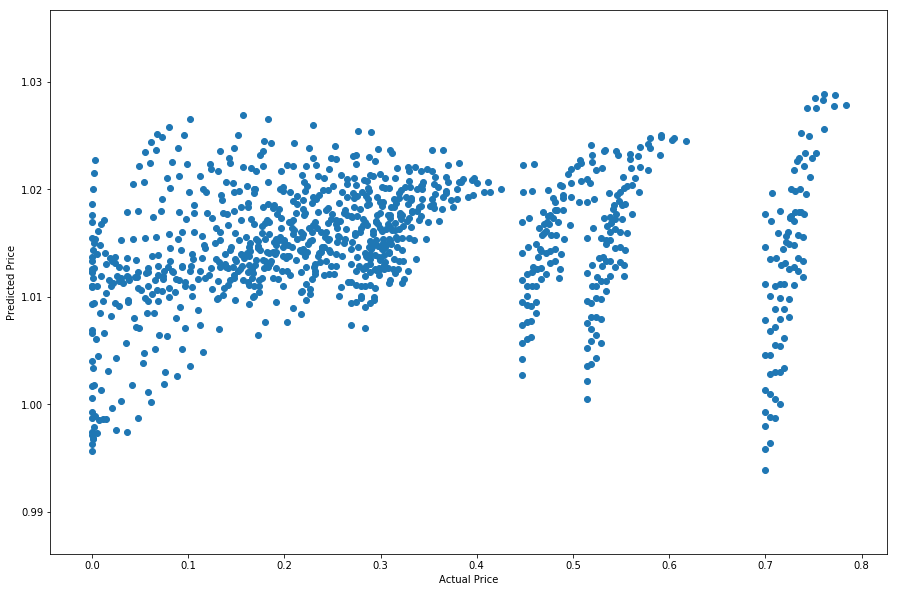

In [19]:
plt.figure(figsize = (15,10))
plt.scatter(y_test[0:1000], predictions[0:1000])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
